## Caso uso 1: clustering  

In [68]:
# generate certain values
from numpy import random
import pandas as pd

cluster_1_clients_size=500
cluster_2_clients_size=500
cluster_3_clients_size=500

# ages 3 clusters
cluster_1_ages_mu, cluster_1_ages_sigma = 25, 5
cluster_1_ages_values = [int(x) for x in random.normal(cluster_1_ages_mu, cluster_1_ages_sigma, cluster_1_clients_size)]

cluster_2_ages_mu, cluster_2_ages_sigma = 40, 10
cluster_2_ages_values = [int(x) for x in random.normal(cluster_2_ages_mu, cluster_2_ages_sigma, cluster_2_clients_size)]

cluster_3_ages_mu, cluster_3_ages_sigma = 60, 5
cluster_3_ages_values = [int(x) for x in random.normal(cluster_3_ages_mu, cluster_3_ages_sigma, cluster_3_clients_size)]

# incomes 3 clusters
cluster_1_incomes_mu, cluster_1_incomes_sigma = 20, 3
cluster_1_incomes_values = [int(x) for x in random.normal(cluster_1_incomes_mu, cluster_1_incomes_sigma, cluster_1_clients_size)]

cluster_2_incomes_mu, cluster_2_incomes_sigma = 40, 5
cluster_2_incomes_values = [int(x) for x in random.normal(cluster_2_incomes_mu, cluster_2_incomes_sigma, cluster_2_clients_size)]

cluster_3_incomes_mu, cluster_3_incomes_sigma = 60, 5
cluster_3_incomes_values = [int(x) for x in random.normal(cluster_3_incomes_mu, cluster_3_incomes_sigma, cluster_3_clients_size)]


clients_df = pd.DataFrame(data={'age': np.append(cluster_1_ages_values, [cluster_2_ages_values, cluster_3_ages_values]), 
                                'gross_income_Ks': np.append(cluster_1_incomes_values, [cluster_2_incomes_values, cluster_3_incomes_values])})
clients_df.tail()

,age,gross_income_Ks
1495,54,60
1496,62,62
1497,54,64
1498,60,49
1499,59,66


### Edades anonimizadas como intervalos y no valores exactos

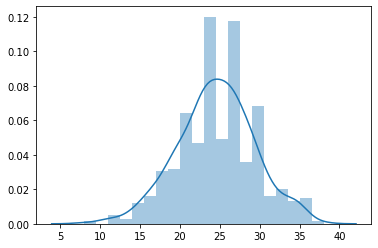

In [69]:
import seaborn as sns

ax = sns.distplot(cluster_1_ages_values)

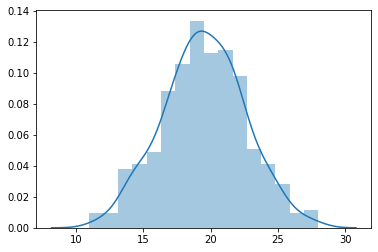

In [70]:
ax = sns.distplot(cluster_1_incomes_values)

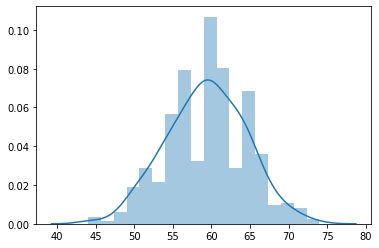

In [71]:
ax = sns.distplot(cluster_3_incomes_values)

In [72]:
import plotly.graph_objects as go
import plotly.express as px


fig = px.scatter(clients_df, x=clients_df['age'], y=clients_df['gross_income_Ks'], hover_data=['age', 'gross_income_Ks'])

fig.show()

### Squared Eucliden Distance between 2 points

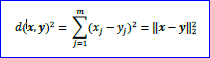

In [73]:
from IPython.display import Image
Image("..\pics\euclidean_distance_from_centroid.PNG", width=1, height=3)

### Optimization algo

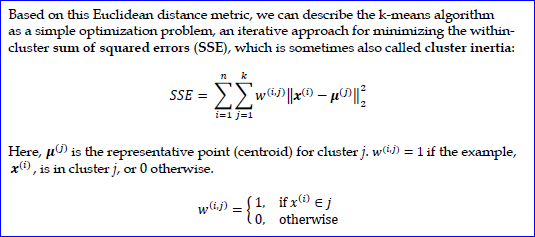

In [74]:
from IPython.display import Image
Image("..\pics\optimization_algo.PNG", width=1, height=3)


In [75]:
>>> from sklearn.cluster import KMeans
>>> km = KMeans(n_clusters=3,
... init='random',
... n_init=10,
... max_iter=300,
... tol=1e-04,
... random_state=0)
>>> y_km = km.fit_predict(clients_df)

In [77]:
fig = px.scatter(clients_df, x=clients_df['age'], y=clients_df['gross_income_Ks'], hover_data=['age', 'gross_income_Ks'])

fig.show()

array([2, 2, 2, ..., 1, 1, 1])

In [90]:
#Clusters masks

clients_cluster_1_mask = y_km == 0
clients_cluster_2_mask = y_km == 1
clients_cluster_3_mask = y_km == 2

In [88]:
'''
fig = px.scatter(clients_df[clients_cluster_1_mask], x=clients_df[clients_cluster_1_mask]['age'], y=clients_df[clients_cluster_1_mask]['gross_income_Ks'], hover_data=['age', 'gross_income_Ks'])
fig_2 = px.scatter(clients_df[clients_cluster_2_mask], x=clients_df[clients_cluster_2_mask]['age'], y=clients_df[clients_cluster_2_mask]['gross_income_Ks'], hover_data=['age', 'gross_income_Ks'])
fig_3 = px.scatter(clients_df[clients_cluster_3_mask], x=clients_df[clients_cluster_3_mask]['age'], y=clients_df[clients_cluster_3_mask]['gross_income_Ks'], hover_data=['age', 'gross_income_Ks'])

fig.show()
fig_2.show()
'''

"\nfig = px.scatter(clients_df[clients_cluster_1_mask], x=clients_df[clients_cluster_1_mask]['age'], y=clients_df[clients_cluster_1_mask]['gross_income_Ks'], hover_data=['age', 'gross_income_Ks'])\nfig_2 = px.scatter(clients_df[clients_cluster_2_mask], x=clients_df[clients_cluster_2_mask]['age'], y=clients_df[clients_cluster_2_mask]['gross_income_Ks'], hover_data=['age', 'gross_income_Ks'])\nfig_3 = px.scatter(clients_df[clients_cluster_3_mask], x=clients_df[clients_cluster_3_mask]['age'], y=clients_df[clients_cluster_3_mask]['gross_income_Ks'], hover_data=['age', 'gross_income_Ks'])\n\nfig.show()\nfig_2.show()\n"

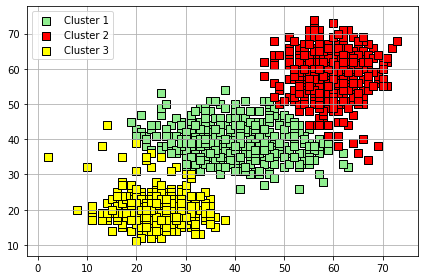

In [93]:
plt.scatter(clients_df[clients_cluster_1_mask]['age'],
clients_df[clients_cluster_1_mask]['gross_income_Ks'],
s=50, c='lightgreen',
marker='s', edgecolor='black',
label='Cluster 1')

plt.scatter(clients_df[clients_cluster_2_mask]['age'],
clients_df[clients_cluster_2_mask]['gross_income_Ks'],
s=50, c='red',
marker='s', edgecolor='black',
label='Cluster 2')


plt.scatter(clients_df[clients_cluster_3_mask]['age'],
clients_df[clients_cluster_3_mask]['gross_income_Ks'],
s=50, c='yellow',
marker='s', edgecolor='black',
label='Cluster 3')

plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

### Insight 5 ejemplo

In [94]:
# incomes 3 clusters
cluster_1_size = 1000
cluster_2_size = 500

cluster_1_conn_freq_mu, cluster_1_conn_freq_sigma = 3, 3
cluster_1_conn_freq_values = [int(x) for x in random.normal(cluster_1_conn_freq_mu, cluster_1_conn_freq_sigma, cluster_1_size)]

cluster_2_conn_freq_mu, cluster_2_conn_freq_sigma = 2, 1
cluster_2_conn_freq_values = [int(x) for x in random.normal(cluster_2_conn_freq_mu, cluster_2_conn_freq_sigma, cluster_2_size)]


In [101]:
younger_clients_mask = clients_df['age'] < 50
clients_df['connection_frequency'] = pd.Series()
cluster_1_size = len(clients_df[younger_clients_mask])
clients_df[younger_clients_mask]['connection_frequency'] = pd.Series([int(x) for x in random.normal(cluster_1_conn_freq_mu, cluster_1_conn_freq_sigma, cluster_1_size)])

older_clients_mask = clients_df['age'] >= 50
cluster_2_size = len(clients_df[older_clients_mask])
clients_df[older_clients_mask]['connection_frequency'] = pd.Series([int(x) for x in random.normal(cluster_2_conn_freq_mu, cluster_2_conn_freq_sigma, cluster_2_size)])


In [106]:
clients_df[younger_clients_mask].tail()

,age,gross_income_Ks,connection_frequency
1380,49,55,NaN
1419,47,51,NaN
1444,46,58,NaN
1460,48,52,NaN
1472,43,48,NaN


In [102]:
fig = px.scatter(clients_df, x=clients_df['age'], y=clients_df['connection_frequency'], hover_data=['age', 'connection_frequency'])

fig.show()

In [103]:
[int(x) for x in random.normal(cluster_1_conn_freq_mu, cluster_1_conn_freq_sigma, cluster_1_size)]

[1,
 5,
 2,
 5,
 0,
 2,
 2,
 2,
 0,
 0,
 -1,
 7,
 5,
 2,
 0,
 2,
 1,
 7,
 1,
 -1,
 13,
 2,
 10,
 7,
 5,
 2,
 6,
 -1,
 3,
 4,
 4,
 0,
 3,
 6,
 3,
 -1,
 6,
 3,
 3,
 5,
 0,
 6,
 0,
 0,
 -2,
 6,
 -2,
 -1,
 2,
 4,
 6,
 5,
 8,
 2,
 0,
 4,
 5,
 6,
 0,
 1,
 0,
 1,
 3,
 1,
 0,
 0,
 4,
 6,
 5,
 3,
 0,
 5,
 0,
 0,
 3,
 -3,
 0,
 0,
 2,
 1,
 0,
 5,
 4,
 6,
 1,
 7,
 3,
 3,
 -3,
 0,
 1,
 6,
 2,
 6,
 3,
 -1,
 2,
 0,
 5,
 0,
 -8,
 3,
 4,
 3,
 2,
 6,
 1,
 6,
 7,
 2,
 2,
 4,
 0,
 4,
 9,
 8,
 -2,
 2,
 4,
 7,
 0,
 3,
 0,
 5,
 0,
 2,
 1,
 0,
 2,
 11,
 9,
 0,
 0,
 6,
 3,
 1,
 0,
 -2,
 7,
 8,
 4,
 2,
 6,
 4,
 2,
 0,
 5,
 7,
 4,
 6,
 0,
 2,
 1,
 0,
 0,
 3,
 1,
 7,
 2,
 5,
 3,
 1,
 1,
 6,
 6,
 2,
 7,
 7,
 3,
 -3,
 0,
 2,
 2,
 8,
 2,
 4,
 5,
 4,
 0,
 2,
 4,
 5,
 0,
 2,
 4,
 -2,
 8,
 6,
 4,
 0,
 3,
 5,
 3,
 0,
 1,
 1,
 9,
 0,
 3,
 7,
 7,
 -3,
 0,
 2,
 7,
 -3,
 2,
 0,
 7,
 0,
 2,
 0,
 1,
 9,
 1,
 4,
 6,
 3,
 5,
 -3,
 0,
 8,
 9,
 7,
 1,
 -2,
 1,
 0,
 0,
 -2,
 -1,
 3,
 4,
 4,
 3,
 0,
 5,
 0,
 8,
 -1,
 2,
 0,
 6,
 8,